In [322]:
%matplotlib inline

import numpy as np
import os
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
from PIL import Image
import math
import importlib
import helper


os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


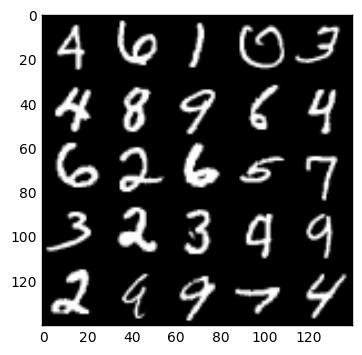

In [326]:
num_img = 25
img = mnist.train.images[:num_img]
img = img.reshape(num_img,28,28,1)

plt.imshow(helper.images_square_grid(img, 'L'), cmap='gray')
#plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [369]:
# Train the network
def train(epoch_count, batch_size, embedded_image_dim, learning_rate, beta1, img_shape, data_image_mode, logs_path):
    
    print_every = 100
    show_every = 1000
    
    samples, losses = [], []
    steps = 0
    
    # get tf input variables
    input_images_tf, target_output_images_tf, embedded_image_input_tf, learning_rate_tf = sens.model_inputs(img_shape, img_shape, len(data_image_mode), embedded_image_dim)

    # get loss and output variables
    autoencoder_cost_tf, autoencoder_output_tf =  sens.model_loss(input_images_tf, len(data_image_mode), target_output_images_tf, embedded_image_dim)
        
    # create model optimizers
    autoencoder_optimizer_tf = sens.model_opt(autoencoder_cost_tf, learning_rate_tf, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        file_writer = tf.summary.FileWriter(logs_path,sess.graph)
        for epoch_i in range(epoch_count):

            for ii in range(mnist.train.num_examples//batch_size):
                
                batch_images,target_images = helper.get_noisy_target_images(mnist.train.next_batch(batch_size),img_shape,0.4,len(data_image_mode))

                steps += 1

                # Run optimizers
                _, autoencoder_training_cost = sess.run([autoencoder_optimizer_tf,autoencoder_cost_tf], feed_dict={input_images_tf: batch_images, target_output_images_tf: target_images, learning_rate_tf:learning_rate})

                
                if steps % print_every == 0:
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Auto Encoder Cost: {:.4f}".format(autoencoder_training_cost))
                    
                    # Save losses to view after training
                    losses.append((autoencoder_training_cost))

                if steps % show_every == 0:
                    helper.show_autoencoder_output(sess, img_shape, mnist.train.next_batch(25),input_images_tf, autoencoder_output_tf, data_image_mode)
                
                

max_in =  1.0   max_out =  0.998093
min_in =  0.0   min_out =  5.56984e-10


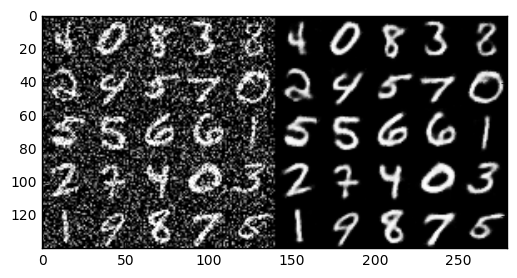

Epoch 2/100... Auto Encoder Cost: 0.0974
Epoch 2/100... Auto Encoder Cost: 0.0966


In [ ]:
import sens_network as sens
import helper
importlib.reload(sens)
importlib.reload(helper)

batch_size = 64
embedded_dim = 512
learning_rate = 0.0001
beta1 = 0.4
data_shape = 28

epochs = 100

# mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, embedded_dim, learning_rate, beta1, data_shape, 'L', './logs/3')
    
